In [83]:
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [2]:
# Importing the csv file of the diabetes data.
df = pd.read_csv("/Users/che-yuliu/Downloads/archive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

__Running some EDA on the data__

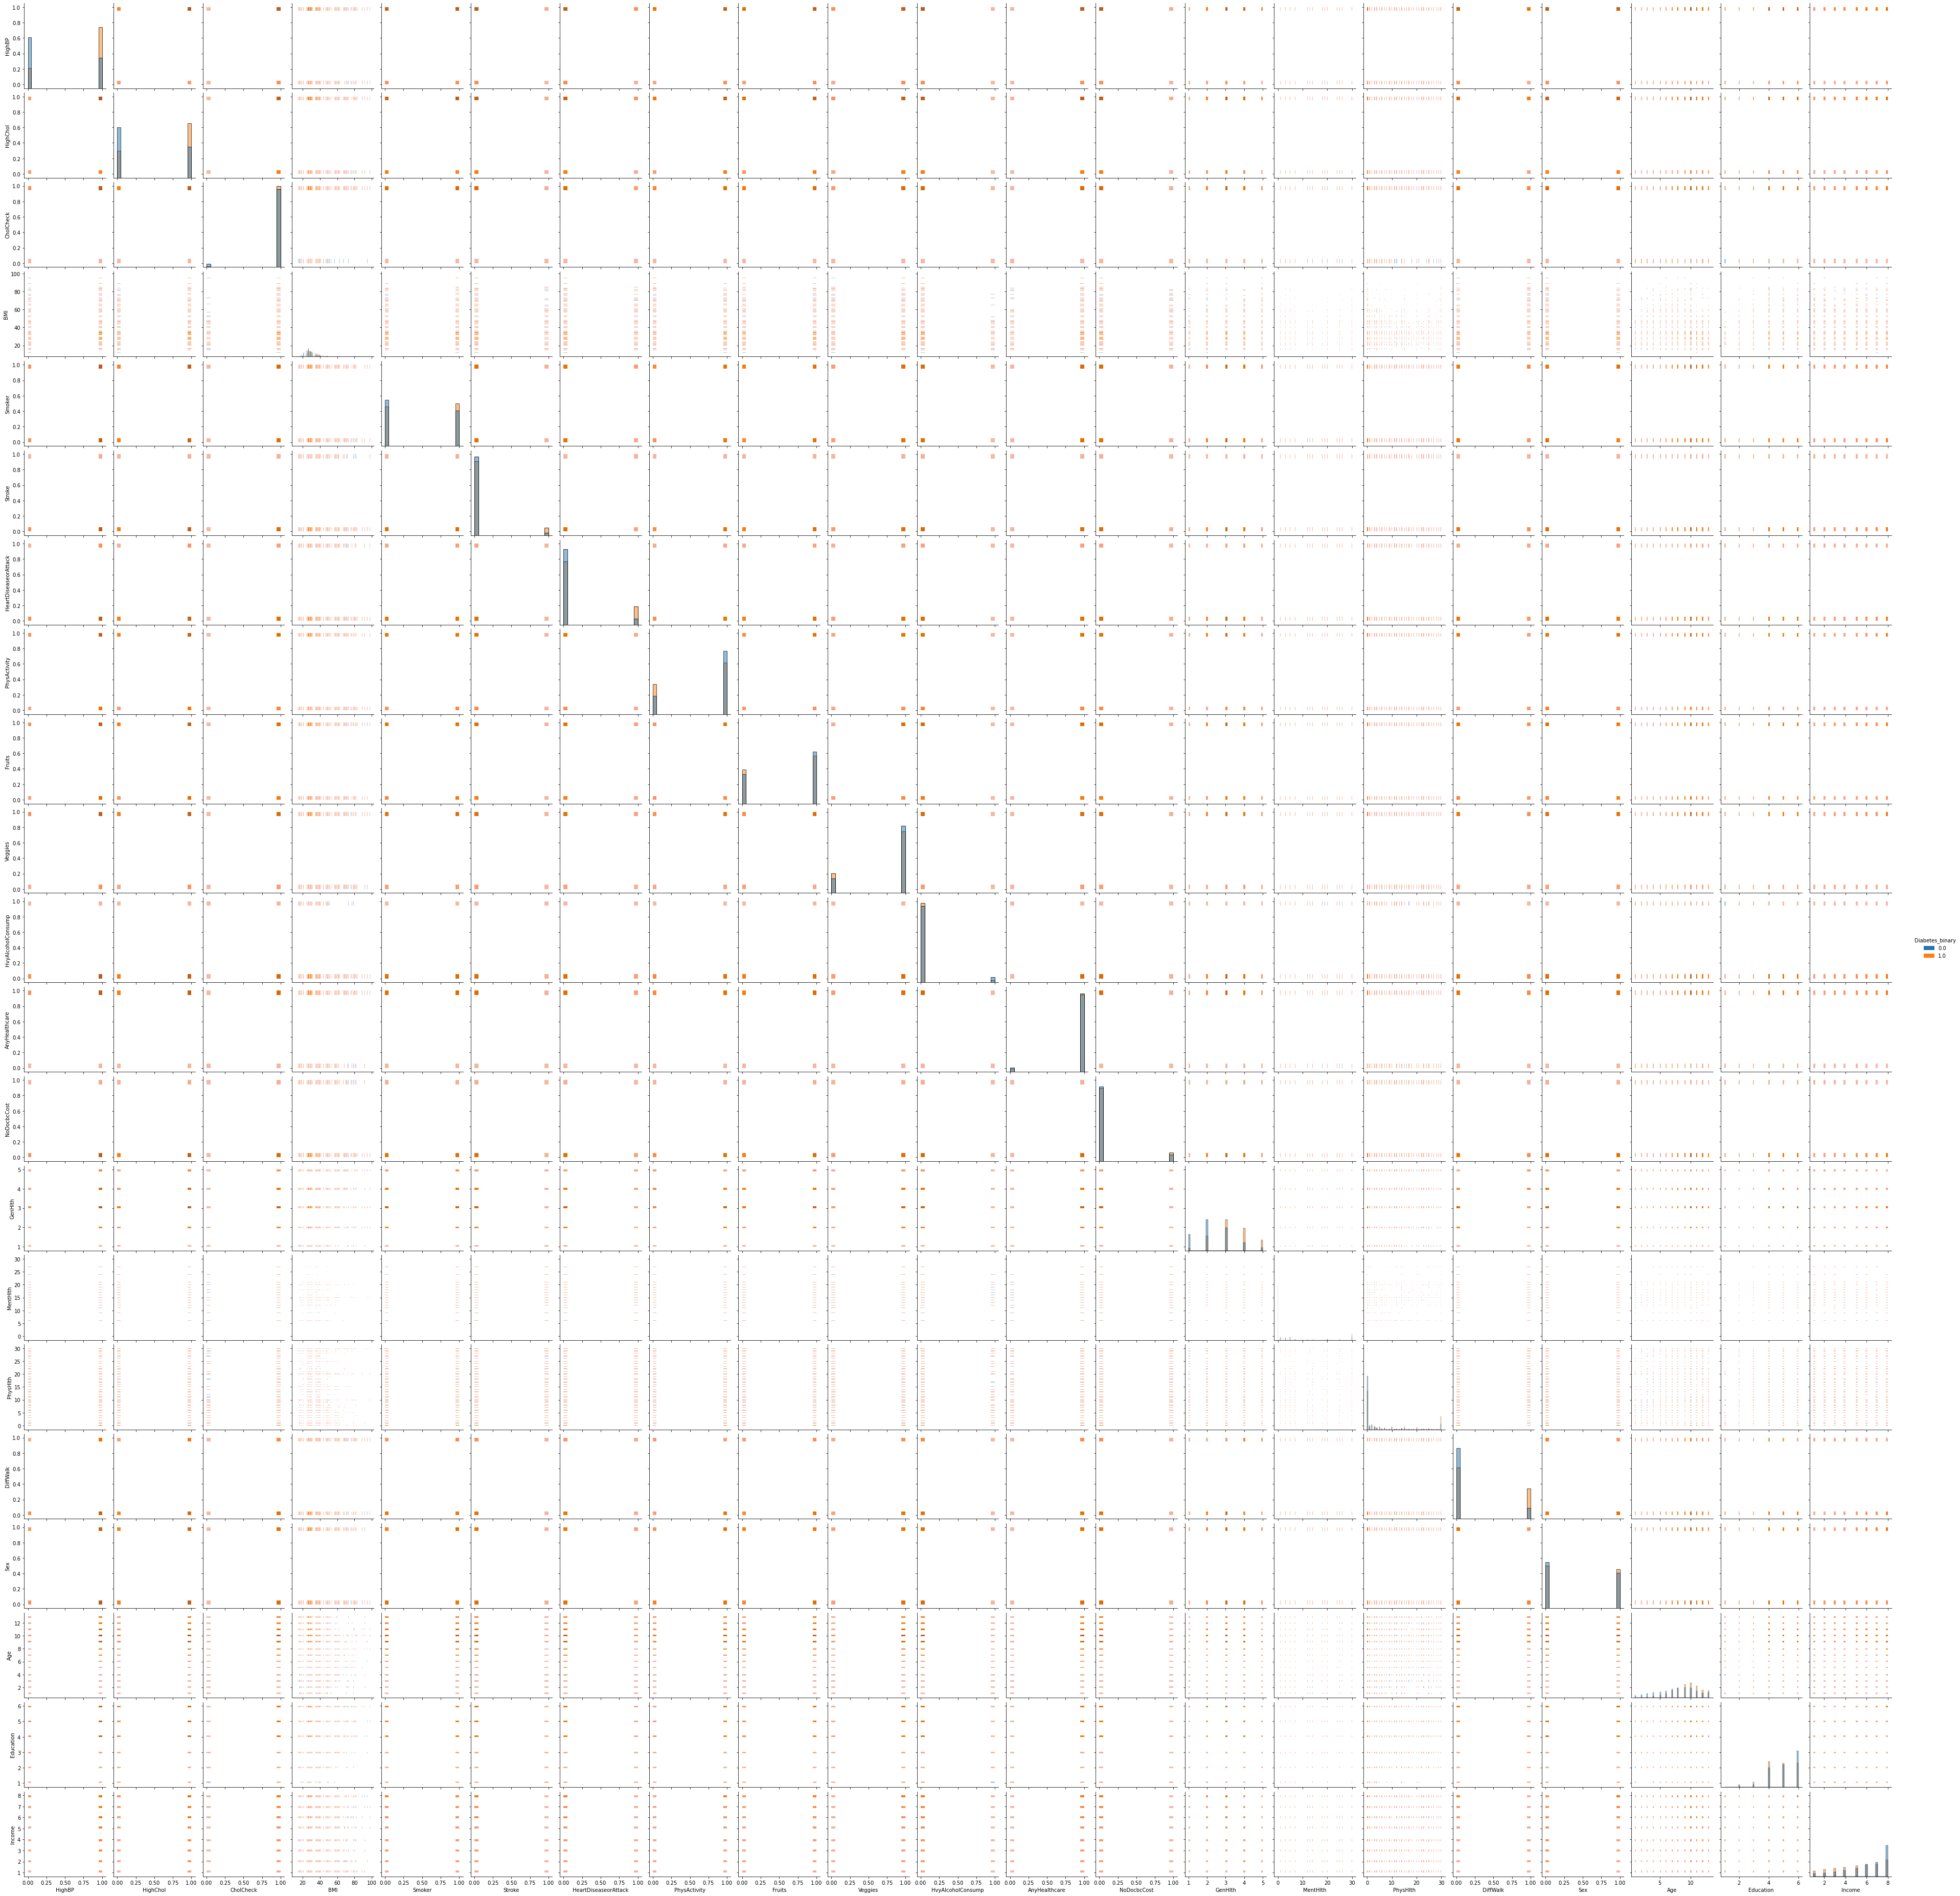

In [4]:
# Some EDA on the data. Looking at distribution 
sns.pairplot(data = df, hue = "Diabetes_binary", kind = "hist")

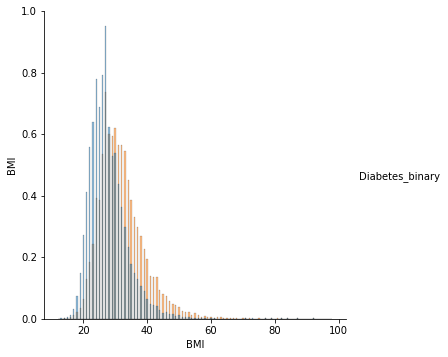

In [5]:
sns.pairplot(data = df, hue = "Diabetes_binary", vars = ["BMI"], kind = "hist", height = 5)


__The data is fairly well organized and due to the binary nature of the data feature engineering cannot be done.__

In [6]:
# Splitting the data into a 80/20 test-train split 
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:-1], df.iloc[:, 0], 
                                                    test_size = 0.2, random_state=42)

In [34]:
X, X_val, y, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 3)

In [35]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
9103,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,10.0,6.0
19708,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,10.0,0.0,0.0,1.0,4.0,6.0
17920,1.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,6.0
52848,1.0,1.0,1.0,23.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,2.0,4.0,0.0,1.0,10.0,2.0
15551,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,15.0,1.0,0.0,1.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68121,1.0,1.0,1.0,38.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,2.0,5.0,0.0,0.0,5.0,5.0
20369,0.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0
57259,1.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,7.0,4.0
21461,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,4.0


In [7]:
# Building a simple logistic regression model. 
LR = LogisticRegression(max_iter = 2000)
def model_performance(feature):
    feat = np.array(X_train[feature]).reshape(-1,1)
    LR.fit(feat,y_train)
    pred = LR.predict_proba(feat)
    score = log_loss(y_train, pred)
    return score

In [38]:
# Baselining a model 
LR.fit(X, y)

LogisticRegression(max_iter=2000)

In [39]:
pred = LR.predict_proba(X)

In [10]:
# Seeing how each feature inidividually affects model performance
print("High BP model score", model_performance("HighBP"))
print("BMI model score", model_performance("BMI"))
print("Phys Activity model score", model_performance("PhysActivity"))
print("Diff Walk model score", model_performance("DiffWalk"))
print("High Chol model score", model_performance("HighChol"))

High BP model score 0.6178041453147257
BMI model score 0.6455131365929024
Phys Activity model score 0.6806780937443578
Diff Walk model score 0.6548551789774523
High Chol model score 0.6512141562468354


In [40]:
# Looking at various metrics for baseline model performance
print("Log Loss score:", log_loss(y, pred))
print("F1 Score:", f1_score(LR.predict(X),y))
print("Recall Score:", recall_score(y, LR.predict(X)))

Log Loss score: 0.5120777238073543
F1 Score: 0.753200538124376
Recall Score: 0.7686107789734733


__Will move on with Recall Score, as I am more concerned with capturing positive cases__

In [41]:
LR.fit(X, y).coef_

array([[ 0.75038248,  0.5900887 ,  1.29229962,  0.07222251, -0.01709382,
         0.15744193,  0.24505909, -0.05171086, -0.03027752, -0.09367366,
        -0.75195312, -0.01992765,  0.07661501,  0.61281655, -0.00374703,
        -0.00756251,  0.15087342,  0.23819577,  0.1582659 , -0.07277775]])

In [37]:
print("Logistic Regression Val Recall score:", recall_score(y_val, LR.predict(X_val)))

Logistic Regression Val Recall score: 0.7645206438068579


__Trying out different models, Starting with Random Forest__

In [43]:
# Trying out other models, Random Forest to see if it gives a better performance
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [44]:
rf_pred = rf.predict(X)
rf_pred

array([0., 0., 0., ..., 1., 0., 0.])

__Using Recall Score as metric of model performance, care more about getting more positives for diabetes__ 

In [45]:
# Scoring with training data 
print("Random Forest Recall score:", recall_score(y, rf_pred))
print("Random Forest F1 Score:", f1_score(rf.predict(X),y))

Random Forest Recall score: 0.9882201851113768
Random Forest F1 Score: 0.9893154814683454


In [105]:
# Recall with validation
print("Random Forest Val Recall score:", recall_score(y_val, rf.predict(X_val)))

Random Forest Val Recall score: 0.7690692792162351


__Random Forest Recall score on the train data is already really good at predicting diabetes outcome__ 

In [46]:
# Trying out for fun to see if tuning the hyperparameters of random forest can get an even closer score to 1
rf1 = RandomForestClassifier(n_estimators = 200)

In [47]:
rf1.fit(X, y)

RandomForestClassifier(n_estimators=200)

In [48]:
rf1_pred = rf1.predict(X)
print("Random Forest Recall score:", recall_score(y, rf1_pred))

Random Forest Recall score: 0.9872016296886763


In [63]:
print("Random Forest baseline Recall score:", recall_score(y_val, rf.predict(X_val)))
print("Random Forest n_estimator 200 Score:", recall_score(y_val, rf1.predict(X_val)))

Random Forest baseline Recall score: 0.7690692792162351
Random Forest n_estimator 200 Score: 0.7716934919524143


__Seeing that changing one hyperparameter gives a better val score we will try running a GridSearch Cross-Val to see if I can get an even better validation score.__

In [64]:
# Creating parameters first, gridsearch technique was taken from a kaggle kernel and applied to the XGBoost Gridsearch.
#https://www.kaggle.com/code/funxexcel/p2-random-forest-tuning-gridsearchcv/notebook 
# n_estimators 
n_estimators = [int(x) for x in np.linspace( start = 100, stop = 300, num = 10)]
# Number of features 
max_features = ["auto", "sqrt"]
# Minimum number of samples required to split 
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 5, num = 3)]
# Minimum number of leaf nodes 
min_samples_leaf = [1,2,3]

In [68]:
param_grid = {"n_estimators" : n_estimators,
             "max_features" : max_features,
             "min_samples_split" : min_samples_split,
             "min_samples_leaf" : min_samples_leaf}
print(param_grid)

{'n_estimators': [100, 122, 144, 166, 188, 211, 233, 255, 277, 300], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 3]}


In [69]:
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = 4, verbose = 2)

In [70]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=122; total time=   4.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=144; total time=   4.7s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=166; total time=   5.4s


/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=122; total time=   4.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=144; total time=   4.7s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=166; total time=   5.4s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=122; total time=   4.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=122; total time=   4.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=144; total time=   4.7s
[CV] END max_features=auto, min_samples_leaf=1

[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=277; total time=   8.9s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   9.5s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   9.8s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=122; total time=   3.6s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=144; total time=   4.3s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=166; total time=   4.9s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=166; total time=   5.0s
[CV] END max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END max_features=auto, min_samples_leaf=1

[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=277; total time=   7.8s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=277; total time=   7.8s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   8.4s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   2.8s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=122; total time=   3.4s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=144; total time=   4.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=166; total time=   4.6s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=188; total time=   5.3s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=188; total time=   5.3s
[CV] END max_features=auto, min_samples_leaf=2

[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=122; total time=   3.2s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=122; total time=   3.2s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=144; total time=   3.8s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=166; total time=   4.3s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=188; total time=   5.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=211; total time=   5.5s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=211; total time=   5.5s
[CV] END max_features=auto, min_samples_leaf=3

[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=255; total time=   6.8s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=277; total time=   7.2s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   7.8s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   2.6s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=122; total time=   3.2s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=122; total time=   3.2s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=144; total time=   3.8s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=166; total time=   4.3s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=188; total time=   4.9s
[CV] END max_features=auto, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=144; total time=   4.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=144; total time=   4.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=166; total time=   5.4s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=188; total time=   6.1s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=211; total time=   7.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=277; total time=   7.3s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=300; total time=   7.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=233; total time=   7.6s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=255; total time=   8.1s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=277; total time=   8.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=277; total time=   8.9s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   9.6s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=277; total time=   8.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   9.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=300; total time=   9.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=277; total time=   8.9s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   8.9s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=122; total time=   3.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=144; total time=   4.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=166; total time=   4.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=166; total time=   4.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=188; total time=   5.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=211; total time=   5.9s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=233; total time=   6.5s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=255; total time=   7.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=277; total time=   7.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   7.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=277; total time=   7.8s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   8.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.8s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.8s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=122; total time=   3.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=144; total time=   3.9s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=233; total time=   6.1s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=255; total time=   6.7s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=255; total time=   6.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=277; total time=   7.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=277; total time=   7.3s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   7.8s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   7.8s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=255; total time=   6.7s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=277; total time=   7.2s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=233; total time=   6.1s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=255; total time=   6.7s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=255; total time=   6.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=277; total time=   7.3s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=300; total time=   7.8s


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 122, 144, 166, 188, 211, 233,
                                          255, 277, 300]},
             verbose=2)

In [72]:
rf_grid.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 277}

In [73]:
# Trying out a new Random forest with these parameters to see if it would give a better validation score
rf2 = RandomForestClassifier(n_estimators = 277, max_features = "sqrt", min_samples_leaf = 3, min_samples_split = 2)

In [74]:
rf2.fit(X, y)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=3,
                       n_estimators=277)

In [76]:
# Creating predictions then using recall as a metric. 
rf2_pred = rf2.predict(X)
print("Random Forest Recall score:", recall_score(y, rf2_pred))

Random Forest Recall score: 0.8807404455072849


In [77]:
# Running a recall with validation data. 
print("Random Forest Val Recall score:", recall_score(y_val, rf2.predict(X_val)))

Random Forest Val Recall score: 0.7925122463261022


In [110]:
# Running recall on test data
print("Random Forest Test Recall score:", recall_score(y_test, rf2.predict(X_test)))

Random Forest Test Recall score: 0.79557384026103


__Now trying Gradient Boosting for fun.__

In [51]:
gb = GradientBoostingClassifier()
gb.fit(X, y)

GradientBoostingClassifier()

In [52]:
gb_pred = gb.predict(X)

In [53]:
print("Gradient Boosting Recall score:", recall_score(y, rf_pred))

Gradient Boosting Recall score: 0.9882201851113768


In [61]:
print("Gradient Boosting Val Recall score:", recall_score(y_val, gb.predict(X_val)))

Gradient Boosting Val Recall score: 0.7888383484954513


<BarContainer object of 20 artists>

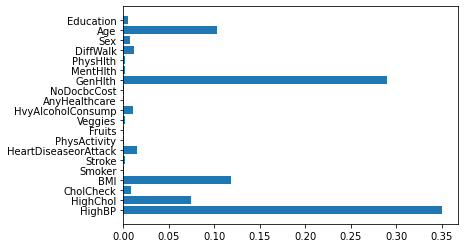

In [106]:
plt.barh(feat_names, gb.feature_importances_)

__Now Trying out XGBoost__

In [84]:
xgb = XGBClassifier()

In [85]:
xgb.fit(X,y)

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:11:10] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=10,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
xgb_pred = xgb.predict(X)
print("XGB Recall Score:", recall_score(y, xgb_pred))

XGB Recall Score: 0.8313183649971215


In [87]:
print("XGB Val Recall Score:", recall_score(y_val, xgb.predict(X_val)))

XGB Val Recall Score: 0.7888383484954513


__XGB baseline performed really well so will try tuning hyperparameters to see if I can get a better score__

In [89]:
# Creating parameters first
# n_estimators 
n_estimators = [int(x) for x in np.linspace( start = 100, stop = 300, num = 10)]
# Number of features 
max_depth = [6,8,10,12]
# Minimum number of samples required to split 
min_child_weight = [1,2]

In [90]:
xgb_param_grid = {"n_estimators" : n_estimators,
             "max_depth" : max_depth,
             "min_child_weight" : min_child_weight}

In [91]:
xgb_grid = GridSearchCV(estimator = xgb, param_grid = xgb_param_grid, n_jobs = 3, verbose = 2)

In [92]:
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be r

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[16:24:32] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..max_depth=6, min_child_weight=1, n_estimators=100; total time=  11.5s
[16:24:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..max_depth=6, min_child_weight=1, n_estimators=100; total time=  11.1s
[16:24:54] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_165954

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[16:24:32] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..max_depth=6, min_child_weight=1, n_estimators=100; total time=  11.6s
[16:24:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..max_depth=6, min_child_weight=1, n_estimators=100; total time=  11.1s
[16:24:55] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_165954

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[16:24:32] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..max_depth=6, min_child_weight=1, n_estimators=100; total time=  11.8s
[16:24:44] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..max_depth=6, min_child_weight=1, n_estimators=122; total time=  13.5s
[16:24:57] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_165954

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[16:36:38] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..max_depth=8, min_child_weight=1, n_estimators=122; total time=  17.3s
[16:36:56] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..max_depth=8, min_child_weight=1, n_estimators=144; total time=  25.1s
[16:37:21] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_165954

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(d

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[16:36:30] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..max_depth=8, min_child_weight=1, n_estimators=122; total time=  17.1s
[16:36:47] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..max_depth=8, min_child_weight=1, n_estimators=144; total time=  20.5s
[16:37:08] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_165954

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(d

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[16:50:47] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..max_depth=8, min_child_weight=2, n_estimators=277; total time=  42.6s
[16:51:30] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..max_depth=8, min_child_weight=2, n_estimators=300; total time=  43.1s
[16:52:13] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_165954

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(d

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[17:04:13] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .max_depth=10, min_child_weight=2, n_estimators=100; total time=  22.5s
[17:04:35] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .max_depth=10, min_child_weight=2, n_estimators=100; total time=  21.7s
[17:04:57] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_165954

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(d

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[16:42:06] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..max_depth=8, min_child_weight=1, n_estimators=277; total time=  40.0s
[16:42:46] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ..max_depth=8, min_child_weight=1, n_estimators=300; total time=  42.8s
[16:43:29] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_165954

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(d

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[16:59:08] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .max_depth=10, min_child_weight=1, n_estimators=233; total time=  41.8s
[16:59:50] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .max_depth=10, min_child_weight=1, n_estimators=255; total time=  53.0s
[17:00:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_165954

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(d

[17:18:46] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .max_depth=12, min_child_weight=1, n_estimators=144; total time=  38.8s
[17:19:25] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .max_depth=12, min_child_weight=1, n_estimators=166; total time=  43.3s
[17:20:08] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_165954

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(d

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[17:32:55] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .max_depth=12, min_child_weight=2, n_estimators=122; total time=  31.9s
[17:33:27] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .max_depth=12, min_child_weight=2, n_estimators=122; total time=  31.2s
[17:33:58] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_165954

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(d

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[17:47:22] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=10,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                             

In [94]:
# Finding the best parameters used 
xgb_grid.best_params_

{'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 122}

In [95]:
# Using these parameters on validation data to see how it changes. 
xgb1 = XGBClassifier(n_estimators = 122, max_depth = 6, min_child_weight = 2)

In [96]:
xgb1.fit(X,y)

/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/che-yuliu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:50:46] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=122, n_jobs=10,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
xgb1_pred = xgb1.predict(X)
print("XGBoost Train Recall score:", recall_score(y, xgb1_pred))

XGBoost Train Recall score: 0.8325140604933351


In [101]:
# Getting Recall Score for the validation set 
print("XGBoost Train Recall score:", recall_score(y_val, xgb1.predict(X_val)))

XGBoost Train Recall score: 0.7923372988103569


In [103]:
xgb1.feature_importances_

array([0.5189151 , 0.05689172, 0.04263725, 0.02262454, 0.01140805,
       0.01319297, 0.02640644, 0.01088498, 0.01056416, 0.01103192,
       0.03238272, 0.01022006, 0.00929487, 0.11613016, 0.01056254,
       0.01101545, 0.02424148, 0.01798728, 0.03109662, 0.01251173],
      dtype=float32)

<BarContainer object of 20 artists>

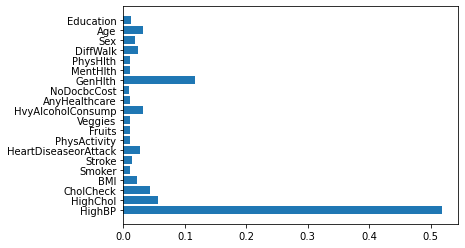

In [104]:
plt.barh(feat_names, xgb1.feature_importances_)
plt.title

In [111]:
print("XGBoost Test Recall score:", recall_score(y_test, xgb1.predict(X_test)))

XGBoost Test Recall score: 0.789048091927933


__With just the train data, without any change in parameters, both random forest and Gradient boosting give really high recall scores compared to Logistic Regression so we will continue with just Decision trees__

__Trying one final model, Naive Bayes__

In [54]:
# Fitting a naive bayes 
nb = BernoulliNB()
nb.fit(X, y)
nb_pred = nb.predict(X)

In [107]:
print("Naive Bayes Recall score:", recall_score(y, nb_pred))

Naive Bayes Recall score: 0.6885877507639165


In [109]:
print("Naive Bayes Val Recall score:", recall_score(y_val, nb.predict(X_val)))

Naive Bayes Val Recall score: 0.6908677396780966


__Naive Bayes performed the worst, so we will continue with random forest (Decision trees).__ 

In [27]:
feat_names = X_train.columns.values.tolist()
feat_names

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education']

In [56]:
# Running feature importance to see which features contribute most to presence of diabetes 
rf.feature_importances_

array([0.08126519, 0.04162097, 0.00629606, 0.18854815, 0.03106434,
       0.01101757, 0.01996591, 0.02471288, 0.03104519, 0.0250846 ,
       0.00989031, 0.00827663, 0.01360044, 0.11447315, 0.05770959,
       0.07647538, 0.02644144, 0.02896289, 0.13774326, 0.06580607])

<BarContainer object of 20 artists>

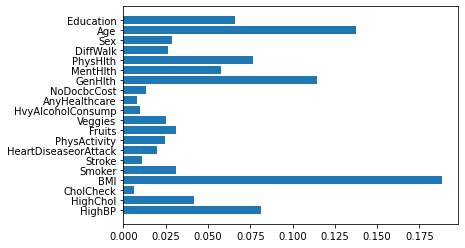

In [57]:
# Plotting feature importance from the baseline random forest 
plt.barh(feat_names, rf.feature_importances_)

In [58]:
rf1.feature_importances_

array([0.08623764, 0.04188863, 0.00620566, 0.18820265, 0.0312832 ,
       0.01114492, 0.02007938, 0.02448412, 0.03106692, 0.02402589,
       0.00999665, 0.00846127, 0.01321728, 0.10689724, 0.05823752,
       0.07674246, 0.028501  , 0.02868876, 0.13897561, 0.06566318])

<BarContainer object of 20 artists>

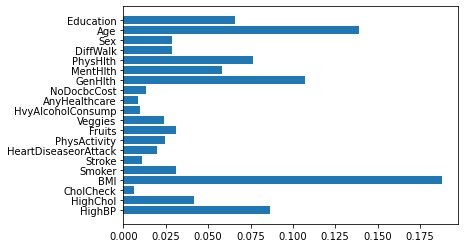

In [59]:
# Plotting feature importance from the second version random forest
plt.barh(feat_names, rf1.feature_importances_)

__Overall not much difference between the two Random Forest Models__

__Curious to see how Logistic Regression Coefficients tell how important each feature is__

Text(0, 0.5, 'Coefficient Values')

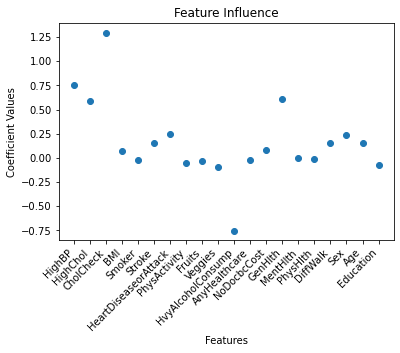

In [93]:
# Plotting the coefficients to see how features influence the target variable, yes or no diabetes.
plt.scatter(feat_names, LR.fit(X, y).coef_)
plt.xticks(feat_names, rotation = 45, ha = "right")
plt.title("Feature Influence")
plt.xlabel("Features")
plt.ylabel("Coefficient Values")

__Logistic regression sees High BP, High Chol and Chol Check, AlcConsump as much more important with CholCheck as most important__

__Random Forest sees Age, GenHealth, PhysHealth, BMI, High BP and Education as more important with BMI being the most important__

__In terms of which model seems to work better for my purposes, Random Forest seems to show things that work better for this project__

In [79]:
# Running a final recall score on the test data with the rf2 model 
print("Random Forest test data, Recall Score:", recall_score(y_test, rf2.predict(X_test)))

Random Forest test data, Recall Score: 0.79557384026103


Text(0.5, 0, 'Gini Importance')

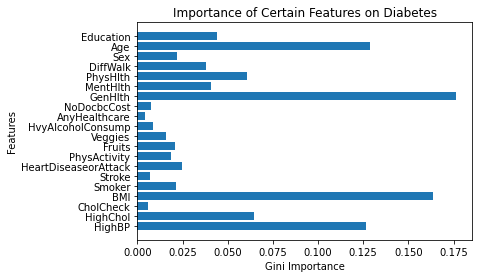

In [82]:
# Seeing if the feature importances change, most likely won't but confirming for sanity
plt.barh(feat_names, rf2.feature_importances_)
plt.title("Importance of Certain Features on Diabetes")
plt.ylabel("Features")
plt.xlabel("Gini Importance")

__Education is not that important anymore and most important ones seem to be Age, Gen Health, BMI, High Chol, High BP__